In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# task 1

In [3]:
# Чтение дат, вхождений необходимых имен из файлов.
dates, ruth, robert  = [], [], []

for i in range(1900, 2001):
    dates.append(str(i))
    df = pd.read_csv('names/yob{}.txt'.format(i), names=['Name', 'Gender', 'Count'])
    df_name = df.query('Name == "Ruth"')
    ruth.append(df_name['Count'].sum())
    df_name = df.query('Name == "Robert"')
    robert.append(df_name['Count'].sum())

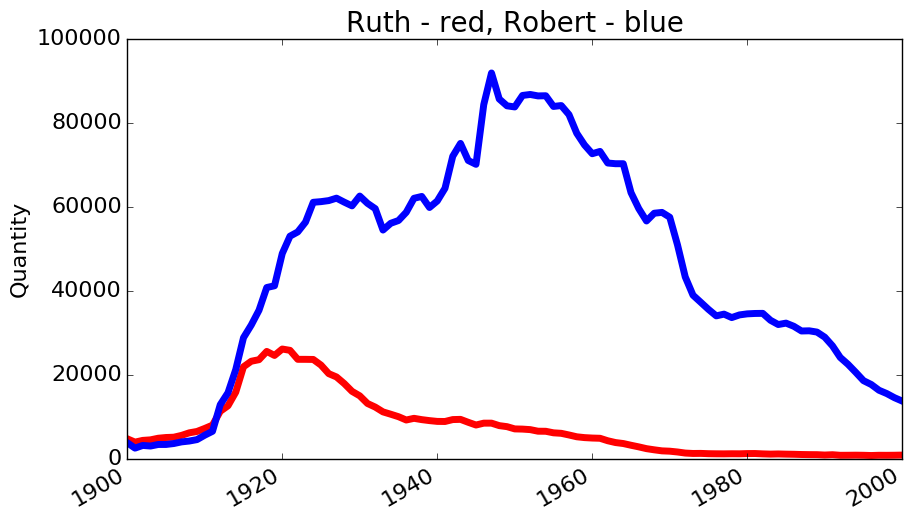

In [4]:
# Нанесение данных на диаграмму.
fig = plt.figure(dpi=128, figsize=(10, 6))
plt.plot(dates, ruth, c='red', linewidth=5)
plt.plot(dates, robert, c='blue', linewidth=5)

# Форматирование диаграммы.
plt.title("Ruth - red, Robert - blue", fontsize=20)
plt.xlabel('', fontsize=16)
fig.autofmt_xdate()
plt.ylabel("Quantity", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)

plt.show()

In [5]:
# task 2

In [6]:
# Чтение данных с запросом необходимых имен из файлов.
names_by_year = dict()
for i in range(1900, 2001, 5):
    df = pd.read_csv('names/yob{}.txt'.format(i), names=['Name','Gender','Count']).query('Name == ["Ruth", "Robert"]')
    names_by_year[i] = df
    
names = pd.concat(names_by_year, names=['Year', 'Pos'])

In [7]:
# Группировка по имени с подсчетом количества употреблений имен.
name_dynamics = names.groupby([names.index.get_level_values(0), 'Name']).sum()

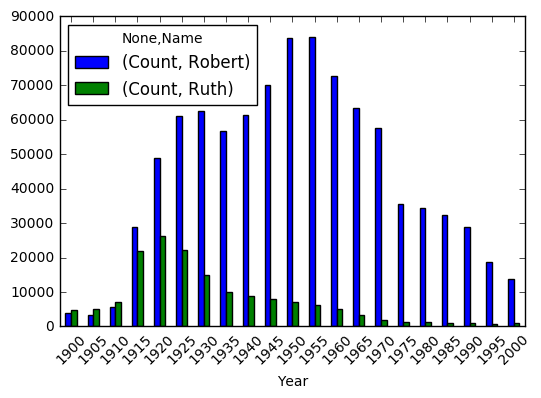

In [8]:
name_dynamics.unstack('Name').plot(kind='bar', rot=45)

In [9]:
# task 3

In [10]:
# Чтение данных из файла.
df = pd.read_csv('names/yob1950.txt', names=['Name', 'Gender', 'Count'])

In [11]:
# Присваиваем значение False для имен, не начинающихся на 'R'
df['Name'] = df['Name'].map(lambda x: x if x.startswith('R') else False)

In [12]:
# Запрос имен начинающихся на 'R'
names = df.query('Name != False')

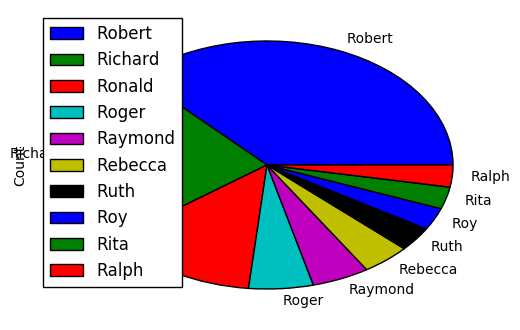

In [13]:
# Группировка по имени с подсчетом количества употреблений имен и сортировкой по убыванию. Вывод топ-10 на диаграмму.
names.groupby('Name').sum().sort_values(by='Count', ascending=False).head(10).plot(kind='pie', y='Count')

In [14]:
# task 4

In [15]:
# Чтение данных из файла.
names_by_year = list()
for i in range(1900, 2001):
    df = pd.read_csv('names/yob{}.txt'.format(i), names=['Name','Gender','Count'])
    names_by_year.append(df)
    
names = pd.concat(names_by_year, names=['Year', 'Pos'])

In [16]:
# Группировка по имени с подсчетом количества употреблений имен.
df = names.groupby(['Name'], as_index=False).sum()

In [17]:
# Добаляем в датафрейм колонку с количеством согласных букв в имени.
vowel = ('I', 'E', 'A', 'Y', 'U', 'O')
df['Check'] = df.apply(lambda row: len([i for i in row.Name if i.upper() not in vowel]), axis=1)

In [18]:
# Группировка по количеству согласных букв с подсчетом количества употреблений имен.
df.groupby(['Check'], as_index=False).sum()

,Check,Count
0,0,3149
1,1,5141684
2,2,48246208
3,3,98120665
4,4,85090551
5,5,35924629
6,6,4040848
7,7,149026
8,8,1777502
9,9,1247


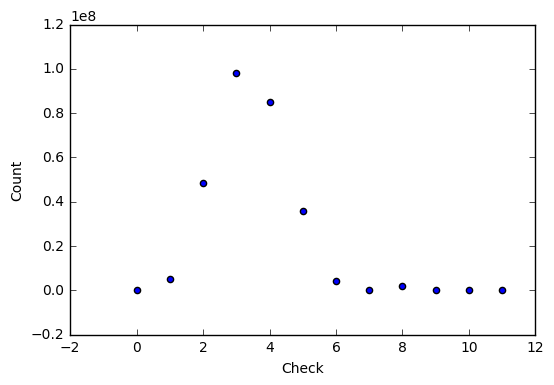

In [19]:
df.groupby(['Check'], as_index=False).sum().plot(kind='scatter', x='Check', y='Count')